# Segment



In [27]:
# Imports
import math
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from utils import read_dataset

In [16]:
dataset = read_dataset('segment')
data = dataset['data']

[ 0/1] Reading segment dataset...


In [18]:
df = pd.DataFrame(data)
df = df.drop(columns=['class', 'region-pixel-count'])
#df = df.replace(b'?', np.nan)
df.head()

,region-centroid-col,region-centroid-row,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,218.0,178.0,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055
1,113.0,130.0,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325
2,202.0,41.0,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992
3,32.0,173.0,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886
4,61.0,197.0,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227


In [30]:
scaler = MinMaxScaler()
df[:] = scaler.fit_transform(df)

df.head()

,region-centroid-col,region-centroid-row,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,0.857708,0.695833,0.333333,0.0,0.028517,0.000552,0.024845,0.000393,0.415700,0.382496,0.498527,0.359313,0.472014,0.627059,0.148008,0.498527,0.318996,0.168489
1,0.442688,0.495833,0.000000,0.0,0.009506,0.000253,0.007453,0.000263,0.006197,0.000000,0.016937,0.000779,0.789179,0.184705,0.538899,0.016937,1.000000,0.154605
2,0.794466,0.125000,0.000000,0.0,0.032320,0.000779,0.024845,0.000740,0.857735,0.816047,0.926363,0.823845,0.272389,0.663529,0.292220,0.926363,0.199347,0.124946
3,0.122530,0.675000,0.000000,0.0,0.058935,0.001796,0.201242,0.004869,0.303900,0.288493,0.350515,0.268900,0.630597,0.427059,0.309297,0.350515,0.266914,0.175488
4,0.237154,0.775000,0.000000,0.0,0.049430,0.001528,0.058385,0.001389,0.345728,0.322528,0.407953,0.301636,0.563433,0.511765,0.240986,0.407953,0.302925,0.171558


## About the features

From the database:

`
% 7. Attribute Information:
%
%     1.  region-centroid-col:  the column of the center pixel of the region.
%     2.  region-centroid-row:  the row of the center pixel of the region.
%     3.  region-pixel-count:  the number of pixels in a region = 9.
%     4.  short-line-density-5:  the results of a line extractoin algorithm that
%          counts how many lines of length 5 (any orientation) with
%          low contrast, less than or equal to 5, go through the region.
%     5.  short-line-density-2:  same as short-line-density-5 but counts lines
%          of high contrast, greater than 5.
%     6.  vedge-mean:  measure the contrast of horizontally
%          adjacent pixels in the region.  There are 6, the mean and
%          standard deviation are given.  This attribute is used as
%         a vertical edge detector.
%     7.  vegde-sd:  (see 6)
%     8.  hedge-mean:  measures the contrast of vertically adjacent
%           pixels. Used for horizontal line detection.
%     9.  hedge-sd: (see 8).
%     10. intensity-mean:  the average over the region of (R + G + B)/3
%     11. rawred-mean: the average over the region of the R value.
%     12. rawblue-mean: the average over the region of the B value.
%     13. rawgreen-mean: the average over the region of the G value.
%     14. exred-mean: measure the excess red:  (2R - (G + B))
%     15. exblue-mean: measure the excess blue:  (2B - (G + R))
%     16. exgreen-mean: measure the excess green:  (2G - (R + B))
%     17. value-mean:  3-d nonlinear transformation
%          of RGB. (Algorithm can be found in Foley and VanDam, Fundamentals
%          of Interactive Computer Graphics)
%     18. saturatoin-mean:  (see 17)
%     19. hue-mean:  (see 17)
`

- Numerical data has been normalized
- no need to treat different types fo data (all numerical)
- no need to treat missing values (no missing values in this dataset according to problem statement)

## Agglomerative Clustering

In [32]:
linkages = ['complete', 'average', 'single']
affinities = ['euclidean', 'cosine']

cluster_models = []
for linkage in linkages:
    for affinity in affinities:
        cluster_models.append(AgglomerativeClustering(affinity=affinity, linkage=linkage).fit(df))

print(cluster_models)

[AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated'), AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated'), AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated'), AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
       

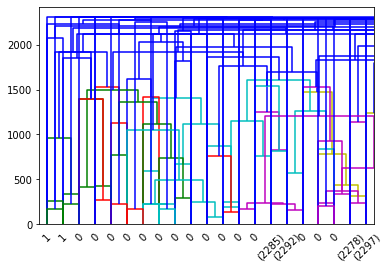

In [36]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
for model in cluster_models:
    plot_dendrogram(model, labels=model.labels_, truncate_mode='level', p=10)
plt.show()